In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import *
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import KFold, train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV, cross_val_score
import numpy as np
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import sys
sys.path.append('/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions')
from Evaluation import *
from Preparation import *
import pickle

In [2]:
X, y, data = preparation_class_threshold()

/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions/Preparation.py:711: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv('../../Dataset/Location.csv')


In [3]:
smoteenn_model = pickle.load(open("Saved_models_remove/lgbm_smote.pkl", 'rb'))
# shap_values = pickle.load(open("shapanalysis/shap_values_remove.pkl", 'rb'))

In [4]:
lgbm_classifier = smoteenn_model.named_steps['lgbmclassifier']
pipeline_smote = make_imb_pipeline(SMOTE(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_smoteen = make_imb_pipeline(SMOTEENN(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_tomek = make_imb_pipeline(SMOTETomek(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_under = make_imb_pipeline(RandomUnderSampler(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))

feature_importances = lgbm_classifier.feature_importances_
feature_importances = feature_importances / np.sum(feature_importances)
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
top_20_features = features_df.head(20)
top_30_features = features_df.head(30)
top_40_features = features_df.head(40)
top_50_features = features_df.head(50)

In [5]:
## Daylight, level, straight, dry, not lighted, view-open
weather_features = ['Crash_Road_Surface_Condition_Sealed - Dry','Crash_Road_Surface_Condition_Sealed - Wet', 
                    'Crash_Road_Surface_Condition_Unsealed - Dry','Crash_Road_Surface_Condition_Unsealed - Wet', 
                    'Crash_Atmospheric_Condition_Clear', 'Crash_Atmospheric_Condition_Fog','Crash_Atmospheric_Condition_Raining',
                    'Crash_Atmospheric_Condition_Smoke/Dust', 'Crash_Lighting_Condition_Darkness - Lighted',
                    'Crash_Lighting_Condition_Darkness - Not lighted','Crash_Lighting_Condition_Dawn/Dusk','Crash_Lighting_Condition_Daylight',
                    'Crash_Road_Horiz_Align_Curved - view obscured','Crash_Road_Horiz_Align_Curved - view open','Crash_Road_Horiz_Align_Straight', 
                    'Crash_Road_Vert_Align_Crest', 'Crash_Road_Vert_Align_Dip', 'Crash_Road_Vert_Align_Grade','Crash_Road_Vert_Align_Level']

new_features =['Crash_Speed_Limit_100 - 110 km/h', 'Crash_Speed_Limit_60 km/h', 'Crash_Speed_Limit_80 - 90 km/h','Crash_Roadway_Feature_No Roadway Feature',
               'Crash_Speed_Limit_0 - 50 km/h','Crash_Traffic_Control_No traffic control','Crash_Nature_Hit object', 'Crash_Nature_Fall from vehicle',
               'Crash_Controlling_Authority_Locally-controlled', 'Crash_Nature_Rear-end','Crash_Nature_Angle','Crash_Month_Q2','Crash_Nature_Hit pedestrian',
               'Crash_Road_Vert_Align_Level','Crash_Road_Horiz_Align_Straight','Crash_Lighting_Condition_Daylight','Crash_Lighting_Condition_Darkness - Not lighted',
               'Crash_Road_Surface_Condition_Sealed - Dry','Crash_Road_Horiz_Align_Curved - view open']

# new_features =['Crash_Speed_Limit_100 - 110 km/h', 'Crash_Speed_Limit_60 km/h', 'Crash_Speed_Limit_80 - 90 km/h','Crash_Roadway_Feature_No Roadway Feature', 'Crash_Speed_Limit_0 - 50 km/h']

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(X[top_20_features.Feature], y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X[new_features], y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.columns = [c.replace(' ', '_') for c in X_train.columns]
X_test.columns = [c.replace(' ', '_') for c in X_test.columns]

### SMOTE

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.3453389844511431
-------------------------------------------------------------
Evaluation
Average training score:  0.3500307786702373
Average validation score:  0.3453389844511431
Accuracy:  0.330888549457495
Precision:  0.5245507460169148
Recall:  0.330888549457495
F1-Score:  0.3594017885252348
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.05      0.46      0.09      1166
   Minor injury       0.19      0.39      0.26     10409
Property damage       0.31      0.46      0.37     17442
 Serious injury       0.69      0.27      0.38     46927

       accuracy                           0.33     75944
      macro avg       0.31      0.39      0.28     75944
   weighted avg       0.52      0.33      0.36     75944



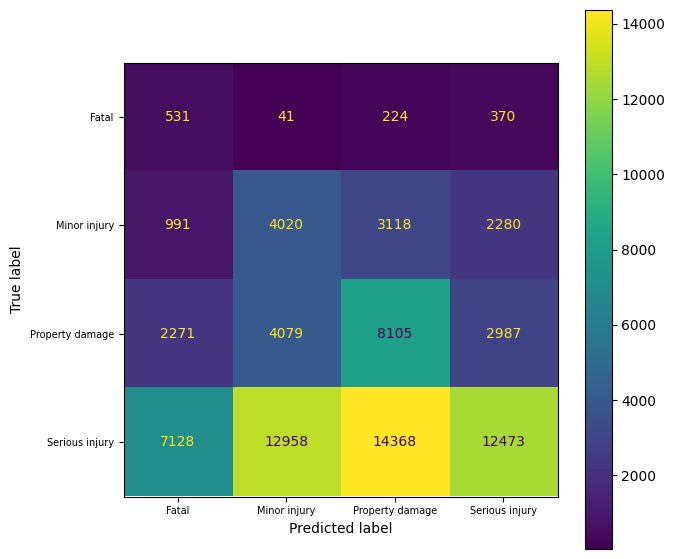

In [7]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smote, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_smote = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)

Best parameters: {'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__n_estimators': 300}
Best score:  0.2781179504880927
-------------------------------------------------------------
Evaluation
Average training score:  0.2791359712226973
Average validation score:  0.2781179504880927
Accuracy:  0.2745180659433267
Precision:  0.5402084542774503
Recall:  0.2745180659433267
F1-Score:  0.2823987341344953
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.05      0.59      0.08      1166
   Minor injury       0.19      0.42      0.26     10409
Property damage       0.31      0.48      0.38     17442
 Serious injury       0.72      0.16      0.26     46927

       accuracy                           0.27     75944
      macro avg       0.31      0.41      0.24     75944
   weighted avg       0.54      0.27      0.28     75944



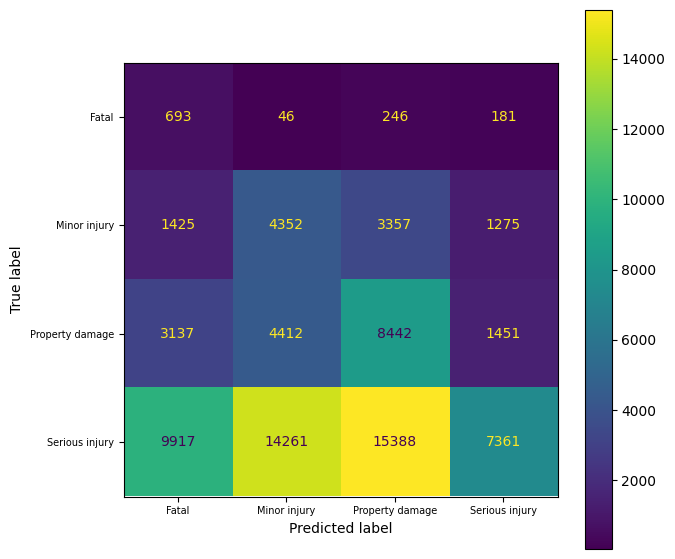

In [12]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [300],  # Default: 100
    'lgbmclassifier__learning_rate': [0.01],
    # 'lgbmclassifier__subsample': [0.6, 0.8], # Default: 0.1
}
grid_search = GridSearchCV(pipeline_smote, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_smote = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)

### Tomek

Best parameters: {'lgbmclassifier__learning_rate': 0.3, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 0.6}
Best score:  0.386874995079162
-------------------------------------------------------------
Evaluation
Average training score:  0.3914931458938745
Average validation score:  0.3823214435494767
Accuracy:  0.3421468450437164
Precision:  0.5244129871450197
Recall:  0.3421468450437164
F1-Score:  0.37188648678929487
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.05      0.40      0.09      1166
   Minor injury       0.19      0.38      0.25     10409
Property damage       0.31      0.47      0.38     17442
 Serious injury       0.69      0.29      0.40     46927

       accuracy                           0.34     75944
      macro avg       0.31      0.38      0.28     75944
   weighted avg       0.52      0.34      0.37     75944



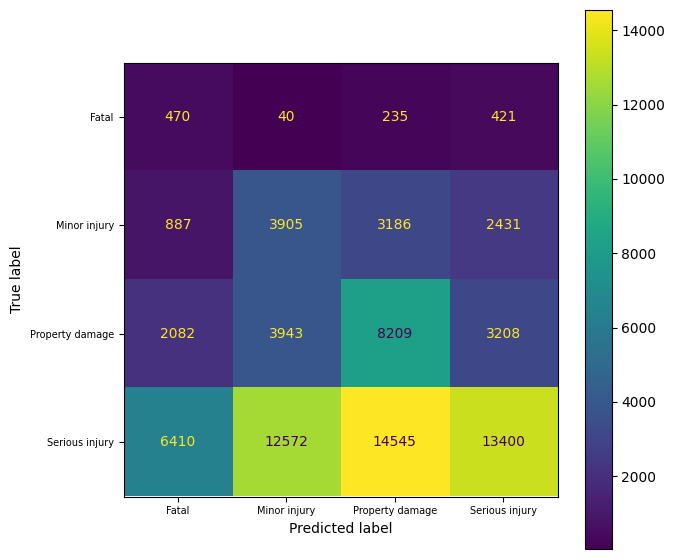

In [23]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100, 300],  # Default: 100
    'lgbmclassifier__learning_rate': [0.1, 0.3],
    'lgbmclassifier__subsample': [0.6, 0.8], # Default: 0.1
}
grid_search = GridSearchCV(pipeline_smote, param_grid, cv=rskf, scoring='f1_weighted', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_smote = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)

In [8]:
model_smote

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('lgbmclassifier',
                 LGBMClassifier(force_row_wise=True, n_jobs=-1, verbose=0))])

In [9]:
import shap

explainer = shap.Explainer(model_smote.named_steps['lgbmclassifier'], X_test.values)
shap_values = explainer(X_test.values)# Use values to convert to numpy array

100%|===================| 303744/303776 [45:13<00:00]        

Text(0.5, 1.0, 'Class: Fatal injury SHAP Values')

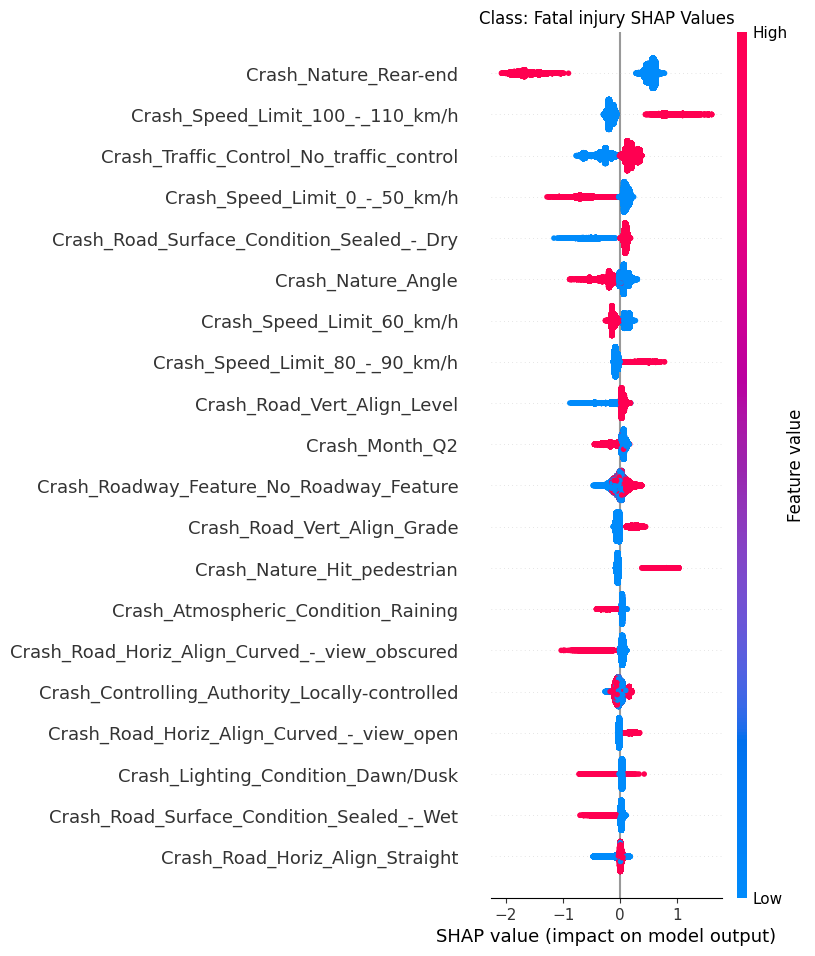

In [10]:
# Visualizing for the first class (index 0)
class_shap_values = shap_values[:, :, 0]
shap.summary_plot(class_shap_values, X_test.values, feature_names=X_test.columns.tolist(), show=False)
plt.title(f'Class: {"Fatal injury"} SHAP Values')

Text(0.5, 1.0, 'Class: Minor injury SHAP Values')

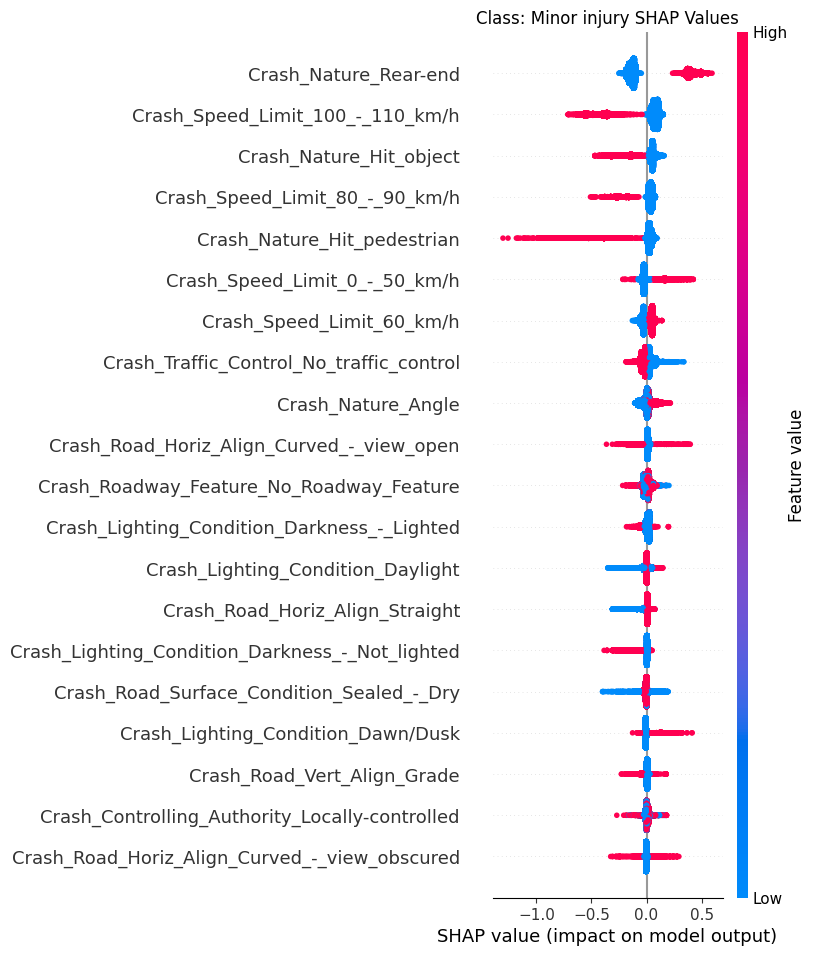

In [11]:
# Visualizing for the first class (index 0)
class_shap_values = shap_values[:, :, 1]

shap.summary_plot(class_shap_values, X_test.values, feature_names=X_test.columns.tolist(), show=False)
plt.title(f'Class: {"Minor injury"} SHAP Values')

Text(0.5, 1.0, 'Class: Property damage SHAP Values')

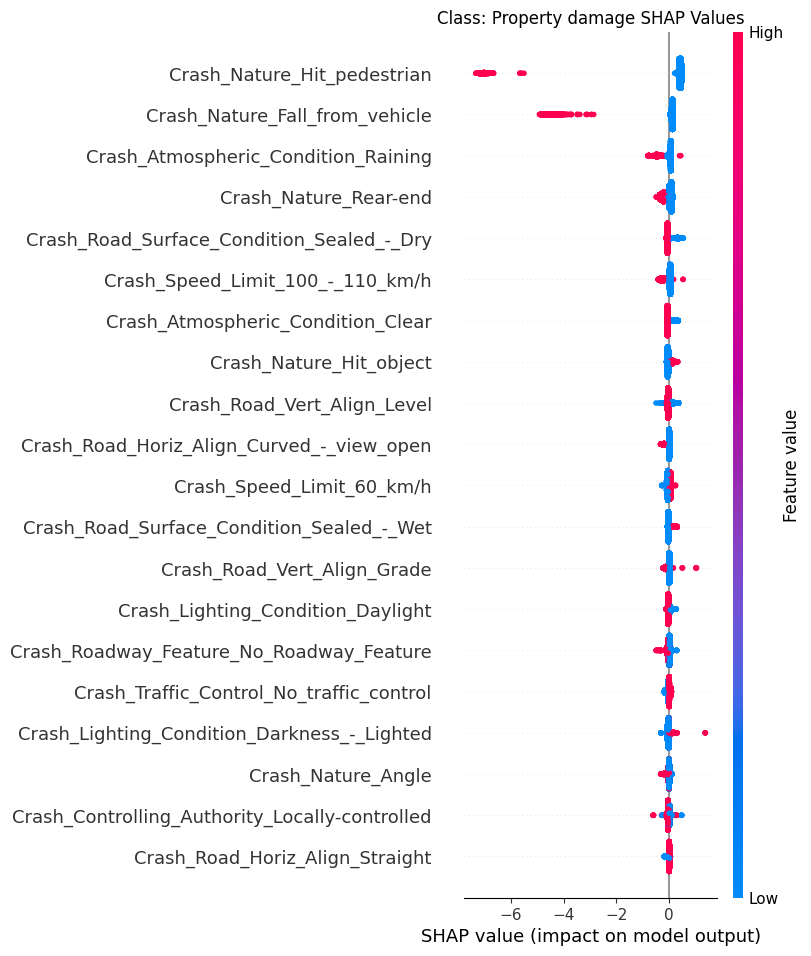

In [12]:
# Visualizing for the first class (index 0)
class_shap_values = shap_values[:, :, 2]

shap.summary_plot(class_shap_values, X_test.values, feature_names=X_test.columns.tolist(), show=False)
plt.title(f'Class: {"Property damage"} SHAP Values')

Text(0.5, 1.0, 'Class: Serious injury SHAP Values')

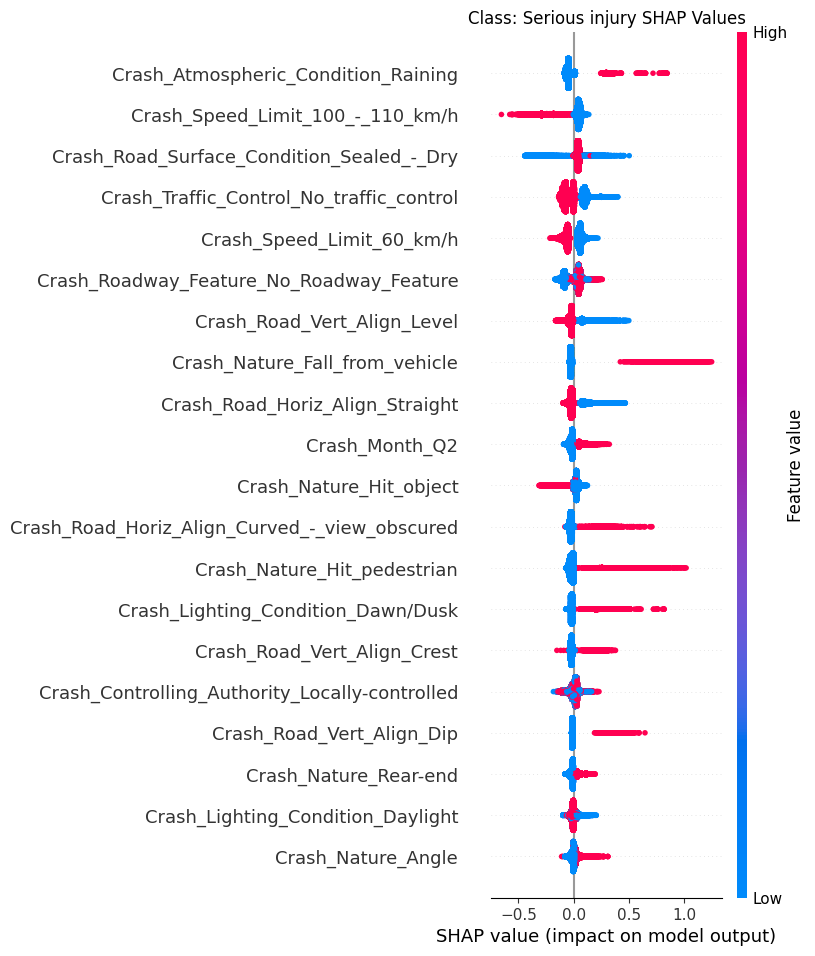

In [13]:
# Visualizing for the first class (index 0)
class_shap_values = shap_values[:, :, 3]

shap.summary_plot(class_shap_values, X_test.values, feature_names=X_test.columns.tolist(), show=False)
plt.title(f'Class: {"Serious injury"} SHAP Values')